# Electron Charge-to-Mass Ratio
## Justin Houle , Liam Patterson

# Abstract


# Introduction


In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
'''
img=mpimg.imread('oildropsetup.jpg')
plt.figure(figsize=(20,10))
plt.axis('off')
imgplot = plt.imshow(img)
plt.show()

print("Milikan Apparatus")
'''

Populating the interactive namespace from numpy and matplotlib


'\nimg=mpimg.imread(\'oildropsetup.jpg\')\nplt.figure(figsize=(20,10))\nplt.axis(\'off\')\nimgplot = plt.imshow(img)\nplt.show()\n\nprint("Milikan Apparatus")\n'

# Data and Calculations

According to the handout, the equation for charge-to-mass is
\begin{equation}
\frac{e}{m} = \frac{2U}{B^2r^2}
\end{equation}

With U = accelerating voltage, B = B-field and r = radius of electron beam

The equation for B-field is 
\begin{equation}
B = \frac{(\frac{4}{5})^\frac{3}{2}\mu_0NI}{R}
\end{equation}

With R = radius of the coil, N = turns per coil, I = current and mu = permeability constant

We plug in B into the initial equation for e/m to get
\begin{equation}
\frac{e}{m} = 2U\frac{(\frac{5}{4})^3R^2}{(N\mu_0Ir)^2}
\end{equation}

For this experiment we are finding the slope of radius^2 vs 1/current^2, so this changes our equation to
\begin{equation}
\frac{e}{m} = 2U\frac{(\frac{5}{4})^3R^2}{(N\mu_0)^2slope}
\end{equation}
since the slope eqauls (rI)^2

We will use this equation to find the value of e/m

In [3]:
import math
import astropy.units as u
from astropy.io import ascii
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [4]:
data = ascii.read('assets/data_jh_lp.csv', 'r')
data

Voltage,Current,D(1)cm,D(2)cm,D(3),D(4),R(1),R(2),R(3),R(4),Average(cm),Average(mm)
int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
120,0.8,11.9,11.7,11.9,12.0,5.95,5.85,5.95,6.0,5.9375,59.375
120,0.85,11.0,10.9,11.4,11.1,5.5,5.45,5.7,5.55,5.55,55.5
120,0.9,10.5,10.7,10.7,11.0,5.25,5.35,5.35,5.5,5.3625,53.625
120,0.95,10.1,10.2,10.1,10.3,5.05,5.1,5.05,5.15,5.0875,50.875
120,1.0,9.7,9.8,9.7,9.8,4.85,4.9,4.85,4.9,4.875,48.75
120,1.05,9.2,9.5,9.3,9.2,4.6,4.75,4.65,4.6,4.65,46.5
120,1.1,8.7,8.8,8.8,8.9,4.35,4.4,4.4,4.45,4.4,44.0
120,1.15,8.4,8.5,8.4,8.6,4.2,4.25,4.2,4.3,4.2375,42.375
120,1.2,8.0,8.3,8.1,8.1,4.0,4.15,4.05,4.05,4.0625,40.625


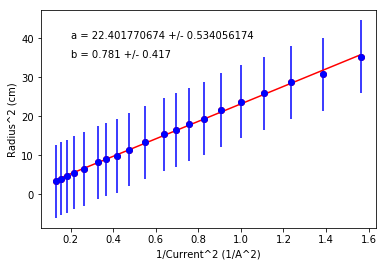

In [29]:
data = ascii.read('assets/data_jh_lp.csv', 'r')

#defining variables and std deviation
ry = data['Average(cm)']**2
ix = 1/data['Current']**2
sdev=np.std(ry)

#defining function and trendline
def func(x, a, b):
    return a*x + b

popt, pcov = curve_fit(func, ix, ry, absolute_sigma=sdev)

#creating plot
plt.plot(ix, ry, 'ro')
plt.plot(ix, np.polyval(popt, ix), 'r')
plt.errorbar(ix, ry, yerr=sdev, fmt='bo')
plt.text(0.2, 40, r"a = {0:.9f} +/- {1:.9f}".format(popt[0], pcov[0,0]**0.5))
plt.text(0.2, 35, r"b = {0:.3f} +/- {1:.3f}".format(popt[1], pcov[1,1]**0.5))
plt.xlabel("1/Current^2 (1/A^2)")
plt.ylabel("Radius^2 (cm)")
plt.show()

In [35]:
#finding experiemental e/m
R=158/10 #converting mm to cm
N=130
mu=(4*np.pi) * 10**-7
U=120
slope=popt[0]

exp_em = (2*U*((5/4)**3)*(R**2)) / (((N*mu)**2)*slope)

#finding percent error
act_em=1.76e11

percent_error=((exp_em-act_em)/act_em) * 100

print(exp_em, "C/kg - experimental value for charge to mass")
print(percent_error, "% - Percent error")

195734181866.0 C/kg - experimental value for charge to mass
11.2126033327 % - Percent error


# Conclusions

The purpose of this lab was to find the charge-to-mass ratio by recreating the experiment done by J.J. Thomson with the cathode ray tube. We found the diameter of the electron beam circle at 120 accelerating voltage for at 20 different values for current with 4 measurements per current and found the average value of radius per current. The slope of the radius vs 1/current^2 was found and this value was used in the equation to find charge-to-mass ratio, which was found to be 1.95e11 C/kg. This is a 11.2 percent error from the accepted value fo 1.76e11 C/kg. This percent error could be due to parallax error and difficulty seeing. When trying to measure the diameter of the circle, the bright beam made it difficult to see the marks on the ruler behind which made it hard to give an exact value. Issues in parallax also might've had an effect but the mirror behind the beam helped for the most part.

# References

The charge-to-mass ratio lab handout